## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugGroupdf = df.groupby("Drug Regimen")


mean_of_tumors = drugGroupdf["Tumor Volume (mm3)"].mean()
median_of_tumors = drugGroupdf["Tumor Volume (mm3)"].median()
var_of_tumors = drugGroupdf["Tumor Volume (mm3)"].var()
std_of_tumors = drugGroupdf["Tumor Volume (mm3)"].std()
sem_of_tumors = drugGroupdf["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Mean of Tumor Vol.": mean_of_tumors,
                                "Median of Tumor Vol.": median_of_tumors,
                                "Variance of Tumor Vol.": var_of_tumors,
                                "Standard Deviation of Tumor Vol.": std_of_tumors,
                                "Sem of Tumor Vol.": sem_of_tumors
    
})

summary_statistics

,Mean of Tumor Vol.,Median of Tumor Vol.,Variance of Tumor Vol.,Standard Deviation of Tumor Vol.,Sem of Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

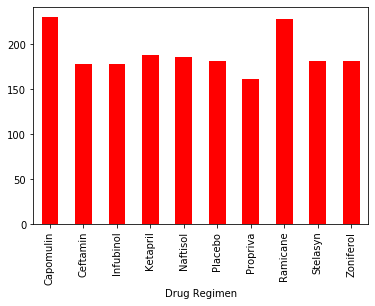

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_point_count = drugGroupdf["Mouse ID"].count()


colors = ['#000000', "#001f33", "#003d66", "#005c99", "#007acc", "#0099ff", "#33adff", "#66c2ff", "#99d6ff", "#ccebff"]

data_point_count.plot(kind="bar", facecolor= "red")

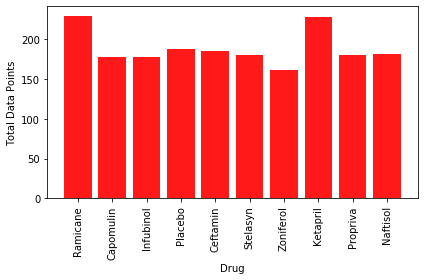

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

data_point_count = drugGroupdf["Mouse ID"].count()

x_axis = df["Drug Regimen"].unique()

#colors = ['#000000', "#001f33", "#003d66", "#005c99", "#007acc", "#0099ff", "#33adff", "#66c2ff", "#99d6ff", "#ccebff"]

plt.bar(x_axis, data_point_count, color= "red", alpha=0.9, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug")
plt.ylabel("Total Data Points")
plt.tight_layout()

## Pie plots

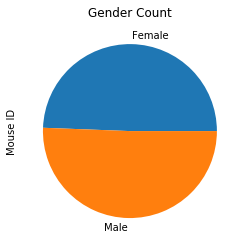

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sexGroupdf= df.groupby("Sex")

sexCount = sexGroupdf["Mouse ID"].count()

# Create a pie chart 

sex_pie = sexCount.plot(kind="pie", y=sexGroupdf, title="Gender Count",)

/Users/margaretpeterson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


([<matplotlib.patches.Wedge at 0x1a234bd6d8>,
 [Text(0.020992503472585564, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592124, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

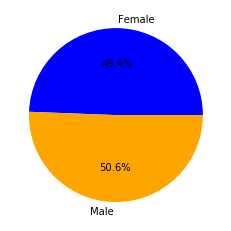

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexGroupdf= df.groupby("Sex")
sexCount = sexGroupdf["Mouse ID"].count()

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sex = [sexCount]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)

plt.pie(sex, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulin, Ramicane, Infubinol, and Ceftamin
max_tumor = df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()

merged_df = max_tumor[["Mouse ID", "Timepoint"]].merge(df, on=["Mouse ID", "Timepoint"], how="left")

capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq - (1.5*capomulin_iqr)

ramicane = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq - (1.5*ramicane_iqr)

infubinol = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
infubinol_quartiles = infubinol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq - (1.5*infubinol_iqr)

ceftamin = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*capomulin_iqr)
ceftamin_upper_bound = ceftamin_upperq - (1.5*capomulin_iqr)

print(f"The lower quartile of Capomulin is: {round(capomulin_lowerq, 2)}")
print(f"The upper quartile of Capomulin is: {round(capomulin_upperq, 2)}")
print(f"The interquartile range of Capomulin is: {round(capomulin_iqr, 2)}")
print("-------------------------")
print(f"The lower quartile of Ramicane is: {round(ramicane_lowerq, 2)}")
print(f"The upper quartile of Ramicane is: {round(ramicane_upperq, 2)}")
print(f"The interquartile range of Ramicane is: {round(ramicane_iqr, 2)}")
print("-------------------------")
print(f"The lower quartile of Infubinol is: {round(infubinol_lowerq, 2)}")
print(f"The upper quartile of Infubinol is: {round(infubinol_upperq, 2)}")
print(f"The interquartile range of Infubinol is: {round(infubinol_iqr, 2)}")
print("-------------------------")
print(f"The lower quartile of Ceftamin is: {round(ceftamin_lowerq, 2)}")
print(f"The upper quartile of Ceftamin is: {round(ceftamin_upperq, 2)}")
print(f"The interquartile range of Ceftamin is: {round(ceftamin_iqr, 2)}")

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
-------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
-------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
-------------------------
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58


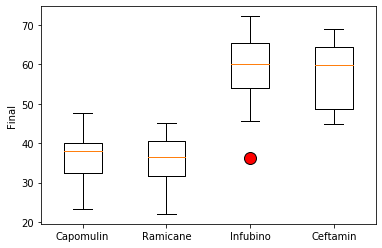

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Plot from values in above cell
formatting = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin],labels=['Capomulin', "Ramicane", "Infubino", "Ceftamin"],flierprops=formatting)
plt.ylabel("Final")
plt.show()

## Line and scatter plots

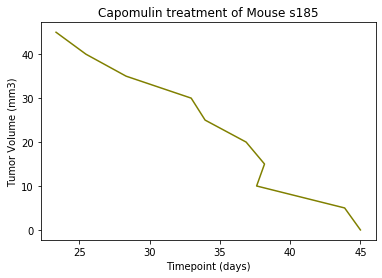

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Isolate the data and sort it out by tumor vol and time point
mouse_id = "s185"
capomulin_loc = df.loc[df["Drug Regimen"] == "Capomulin"]
mouse_choice = capomulin_loc.loc[capomulin_loc["Mouse ID"] == mouse_id]
capomulin_tumor = mouse_choice["Tumor Volume (mm3)"]
capomulin_timepoint = mouse_choice["Timepoint"]

#Plot
plt.title(f"Capomulin treatment of Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(capomulin_tumor, capomulin_timepoint, color="olive", label="Capomulin")
plt.show()
          
          

Text(0, 0.5, 'Tumor Volume')

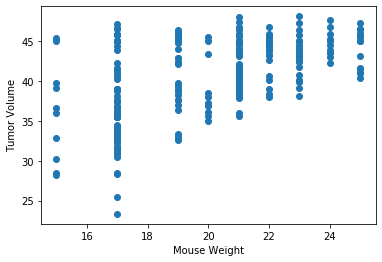

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Sort out the data by drug type, mouse weight, and tumor vol
capomulin_loc = df.loc[df["Drug Regimen"] == "Capomulin"]
capomulin_weight = capomulin_loc["Weight (g)"]
capomulin_tumor_vol = capomulin_loc["Tumor Volume (mm3)"]

#Plot
plt.scatter(capomulin_weight, capomulin_tumor_vol)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")

The correlation between mouse weight and tumor volume is 0.53


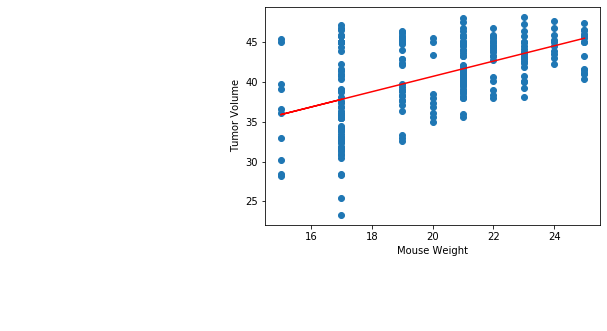

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Sort out the data by drug type, mouse weight, and tumor vol
capomulin_loc = df.loc[df["Drug Regimen"] == "Capomulin"]
capomulin_weight = capomulin_loc["Weight (g)"]
capomulin_tumor_vol = capomulin_loc["Tumor Volume (mm3)"]

#Calc correlation coefficient
correlation = sts.pearsonr(capomulin_weight,capomulin_tumor_vol)
print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(capomulin_weight, capomulin_tumor_vol)
regress_values = capomulin_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(capomulin_weight,capomulin_tumor_vol)
plt.plot(capomulin_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()

